In [1]:
import fetcher
import mock_data_generator as mdg

In [2]:
cities = fetcher.fetch_api()
data = mdg.generate_mock_data(cities)

data.head()

,townsville,waco,rostov,montego bay,sarnia,valledupar,lansing,alexandria,quebec,birmingham,...,sulaymaniyah,perm,naples,charlotte,seattle,penang,kristiansand,lima,buffalo,mauritius (port louis)
0,1,2,0,1,6,0,0,0,0,0,...,186,3,0,95,2,0,3,1,1,110
1,0,0,0,1,0,0,0,0,1,0,...,12,2,0,49,1,1,67,1,0,34
2,0,0,0,0,0,0,4,0,0,1,...,50,2,0,2,1,3,92,2,1,24
3,2,0,0,0,0,0,0,0,0,0,...,111,3,0,28,5,0,31,1,2,96
4,1,0,0,0,0,0,0,2,0,0,...,268,2,0,13,1,2,97,1,1,5


In [3]:
data.describe()

,townsville,waco,rostov,montego bay,sarnia,valledupar,lansing,alexandria,quebec,birmingham,...,sulaymaniyah,perm,naples,charlotte,seattle,penang,kristiansand,lima,buffalo,mauritius (port louis)
count,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,0.000625,0.001000,0.0,0.001250,0.002125,0.000125,0.001375,0.00075,0.000125,0.000625,...,8.698125,0.388875,0.253125,27.161125,1.655000,0.893125,21.684375,1.203750,0.440625,79.03275
std,0.029576,0.054767,0.0,0.080618,0.107805,0.011180,0.062238,0.03535,0.011180,0.037078,...,37.855767,1.031763,0.975921,61.070794,1.528894,1.664271,56.206384,1.469951,1.307551,79.58010
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,23.00000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,55.00000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,25.000000,2.000000,1.000000,4.000000,2.000000,0.000000,109.00000
max,2.000000,4.000000,0.0,7.000000,7.000000,1.000000,4.000000,2.00000,1.000000,3.000000,...,494.000000,11.000000,19.000000,713.000000,16.000000,16.000000,715.000000,20.000000,22.000000,837.00000


In [4]:
sums=data.sum().sort_values(ascending=False)
sums

mauritius (port louis)    632262
charlotte                 217289
kristiansand              173475
santiago de compostela     74454
lafayette                  71683
                           ...  
quebec                         1
valledupar                     1
ibague                         1
rostov                         0
johnstown                      0
Length: 816, dtype: int64

In [5]:
sum = 0
index = 0
total_sum = data.sum().sum()
for count in sums:
    sum+=count
    if sum / total_sum>=0.85:
        print(sum)
        break
    index+=1
index

2184282


54

In [6]:
import city_selector_model as csm

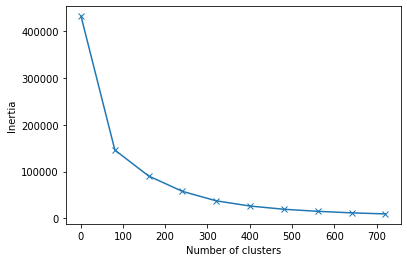

In [7]:
csm.check_clusters(csm.trim_data(data)[0])

In [8]:
tr_data, tr_cities = csm.trim_data(data)
data, model =csm.train_model(tr_data)
labels = data['labels']

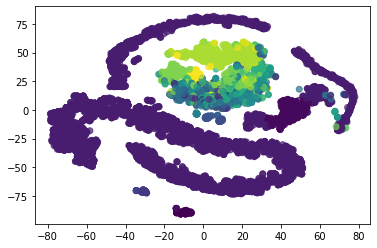

In [9]:
csm.graph_model(tr_data, labels=labels)